<a href="https://colab.research.google.com/github/mjiii25/prac_class/blob/main/pp__notyet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
import string
from matplotlib import font_manager,rc
import datetime

rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Region=pd.read_csv('/content/drive/MyDrive/Region.csv')
Region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,서울,서울,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,서울,강남구,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,서울,강동구,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,서울,강북구,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,서울,강서구,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,경상남도,하만,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,경상남도,함양,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,경상남도,합천,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,제주도,제주도,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


In [4]:
df=Region[['province', 'city', 'latitude', 'longitude']]
df=df[df.province=='서울']
df=df.drop(index=0)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.

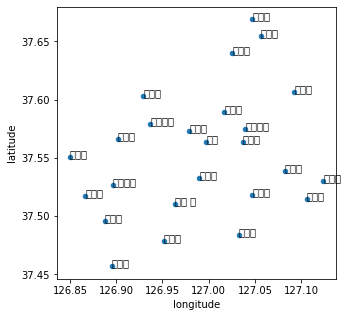

In [5]:
fig,ax = plt.subplots(figsize=(5,5))
df.drop(columns='province').plot.scatter(x='longitude',y='latitude',ax=ax)
for ind in df.index:
  ax.annotate(df.loc[ind]['city'], (df.loc[ind]['longitude'], df.loc[ind]['latitude']))

In [6]:
#clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=2020).fit(df[['longitude','latitude']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [7]:
df['clustering'] = labels
df.head(15)

,province,city,latitude,longitude,clustering
1,서울,강남구,37.518421,127.047222,0
2,서울,강동구,37.530492,127.123837,0
3,서울,강북구,37.639938,127.025508,2
4,서울,강서구,37.551166,126.849506,1
5,서울,관악구,37.478290,126.951502,1
6,서울,광진구,37.538712,127.082366,0
7,서울,구로구,37.495632,126.887650,1
8,서울,금천구,37.456852,126.895229,1
9,서울,노원구,37.654259,127.056294,2
10,서울,도봉구,37.668952,127.047082,2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text

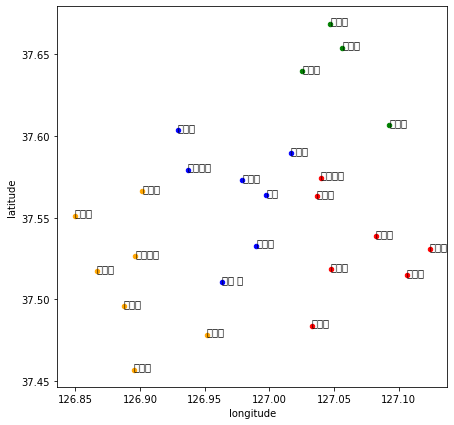

In [8]:
fig,ax = plt.subplots(figsize=(7,7))

df_temp = df[df['clustering'] == 0]
df_temp.plot.scatter(x='longitude', y='latitude', ax=ax, color = 'Red')

df_temp = df[df['clustering'] == 1]
df_temp.plot.scatter(x='longitude', y='latitude', ax=ax, color = 'Orange')

df_temp = df[df['clustering'] == 2]
df_temp.plot.scatter(x='longitude', y='latitude', ax=ax, color = 'Green')

df_temp = df[df['clustering'] == 3]
df_temp.plot.scatter(x='longitude', y='latitude', ax=ax, color = 'Blue')

for ind in df.index:
  ax.annotate(df.loc[ind]['city'], (df.loc[ind]['longitude'], df.loc[ind]['latitude']))

In [9]:
df.loc[:,'clustering'] = df.clustering.replace([0,1,2,3], ['강남구외', '강서구외', '강북구외', '종로구외'])
df.head(20)

,province,city,latitude,longitude,clustering
1,서울,강남구,37.518421,127.047222,강남구외
2,서울,강동구,37.530492,127.123837,강남구외
3,서울,강북구,37.639938,127.025508,강북구외
4,서울,강서구,37.551166,126.849506,강서구외
5,서울,관악구,37.478290,126.951502,강서구외
6,서울,광진구,37.538712,127.082366,강남구외
7,서울,구로구,37.495632,126.887650,강서구외
8,서울,금천구,37.456852,126.895229,강서구외
9,서울,노원구,37.654259,127.056294,강북구외
10,서울,도봉구,37.668952,127.047082,강북구외


In [10]:
region = df

In [11]:
fpopl = pd.read_csv('/content/drive/MyDrive/fpopl.csv')
card = pd.read_csv('/content/drive/MyDrive/card_20200717.csv')

In [12]:
fpopl.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
0,20200101,0,M,age_00,11650560,15
1,20200101,0,M,age_00,11590620,6
2,20200101,0,M,age_00,11560710,4
3,20200101,0,M,age_00,11470680,12
4,20200101,0,M,age_00,11350665,6


In [13]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


In [14]:
adstrd = pd.read_csv('/content/drive/MyDrive/adstrd_master.csv')
adstrd

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515.0,청운효자동,서울특별시,종로구
1,11110530.0,사직동,서울특별시,종로구
2,11110540.0,삼청동,서울특별시,종로구
3,11110550.0,부암동,서울특별시,종로구
4,11110560.0,평창동,서울특별시,종로구
...,...,...,...,...
3488,50130580.0,서홍동,제주특별자치도,서귀포시
3489,50130590.0,대륜동,제주특별자치도,서귀포시
3490,50130600.0,대천동,제주특별자치도,서귀포시
3491,50130610.0,중문동,제주특별자치도,서귀포시


In [15]:
signgu_unique = adstrd.loc[:, 'signgu_nm'].unique()

def isNaN(num):
  return num != num

signgu_unique = [value for value in signgu_unique if not isNaN(value)]
signgu_code = pd.DataFrame(np.full([len(signgu_unique),2], None), columns = ['signgu_nm', 'code'])

for i in signgu_code.index:
  signgu = adstrd[adstrd.loc[:, 'signgu_nm'] == signgu_unique[i]]
  code = signgu.iloc[0]['adstrd_code']
  first4 = int(str(code)[:4])
  signgu_code.loc[i] = [signgu_unique[i],first4]

In [16]:
signgu_code.head()

,signgu_nm,code
0,종로구,1111
1,중구,1114
2,용산구,1117
3,성동구,1120
4,광진구,1121


In [ ]:
first4 = fpopl.loc[:,'adstrd_code'].apply(lambda x:int(str(x)[:4]))
fpopl['signgu_nm'] = first4.replace(signgu_code.code.values, signgu_code.signgu_nm.values)

In [ ]:
first4 = card.loc[:,'adstrd_code'].apply(lambda x:int(str(x)[:4]))
card['signgu_nm'] = first4.replace(signgu_code.code.values, signgu_code.signgu_nm.values)

In [ ]:
fpopl.head()

In [ ]:
card.head()

In [ ]:
fpopl.head()

In [ ]:
card.head()

In [ ]:
def my_datetime(date):
  return pd.Timestamp(str(date)).date()

fpopl.base_ymd = fpopl.base_ymd.map(my_datetime)
card.receipt_dttm = card.receipt_dttm.map(my_datetime)

In [ ]:
def to_numeric(string):
  if string.isnumeric():
    return int(string)
  else:
    return 0

card.salamt = acrd.salamt.map(to_numeric)

In [ ]:
fpopl['clustering'] = fpopl.signgu_nm.replace(region.city.values, region.clustering.values)
card['clustering'] = card.signgu_nm.replace(region.city.values, region.clustering.values)

In [ ]:
fpopl.head()

In [ ]:
card.head()

In [ ]:
fig,axs = plt.subplots(2,2,figsize = (20,20))

fpopl_gangnams = fpopl[fpopl.clustering == '강남구외']
grouped_gangnams = fpopl_gangnams.drop(columns = ['tmzon_se_code', 'adstrd_code']).groupby(['signgu_nm', 'base_ymd']).sum()
for gu in fpopl_gangnams.signgu_nm_unique():
  groupe_gangnams.loc[gu,:].rolling(window = 7).mean()[::7].plot(ax=axs[1,1])
axs[1,1].legend(fpopl_gangnams,signsu_nm.unique())

axs[1,1].set_title('강남구외', fontsize = 20)
axs[1,1].set_xlabel('날짜', fontsize = 15)
axs[1,1].set_ylabel('유동 인구', fontsize = 15)


fpopl_gangseos = fpopl[fpopl.clustering == '강서구외']
grouped_gangseos = fpopl_gangseos.drop(columns = ['tmzon_se_code', 'adstrd_code']).groupby(['signgu_nm', 'base_ymd']).sum()
for gu in fpopl_gangseos.signgu_nm_unique():
  groupe_gangseos.loc[gu,:].rolling(window = 7).mean()[::7].plot(ax=axs[1,1])
axs[1,1].legend(fpopl_gangseos,signsu_nm.unique())

axs[1,1].set_title('강서구외', fontsize = 20)
axs[1,1].set_xlabel('날짜', fontsize = 15)
axs[1,1].set_ylabel('유동 인구', fontsize = 15)


fpopl_gangbuks = fpopl[fpopl.clustering == '강북구외']
grouped_gangbuks = fpopl_gangbuks.drop(columns = ['tmzon_se_code', 'adstrd_code']).groupby(['signgu_nm', 'base_ymd']).sum()
for gu in fpopl_gangbuks.signgu_nm_unique():
  groupe_gangbuks.loc[gu,:].rolling(window = 7).mean()[::7].plot(ax=axs[1,1])
axs[1,1].legend(fpopl_gangbuks,signsu_nm.unique())

axs[1,1].set_title('강북구외', fontsize = 20)
axs[1,1].set_xlabel('날짜', fontsize = 15)
axs[1,1].set_ylabel('유동 인구', fontsize = 15)


fpopl_jongnos = fpopl[fpopl.clustering == '종로구외']
grouped_jongnos = fpopl_jongnos.drop(columns = ['tmzon_se_code', 'adstrd_code']).groupby(['signgu_nm', 'base_ymd']).sum()
for gu in fpopl_jongnos.signgu_nm_unique():
  groupe_jongnos.loc[gu,:].rolling(window = 7).mean()[::7].plot(ax=axs[1,1])
axs[1,1].legend(fpopl_jongnos,signsu_nm.unique())

axs[1,1].set_title('종로구외', fontsize = 20)
axs[1,1].set_xlabel('날짜', fontsize = 15)
axs[1,1].set_ylabel('유동 인구', fontsize = 15)